In [17]:
cog_key = "COPY_THE_KEY_HERE"
cog_endpoint = "COPY_THE_ENDPOINT_URL_HERE"

print("ready to use cognitive service")

ready to use cognitive service


When you buy new shoes
but no one looks at it.
FUNDOES.COM


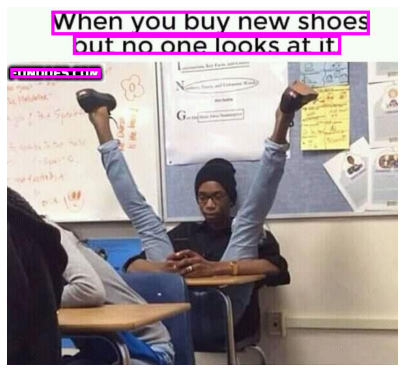

In [22]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient 
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
import time
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as pyplot 
from PIL import Image, ImageDraw
import os
%matplotlib inline

#get a client for the compouter vision service 
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))


#read the printed image file
image_path = os.path.join('images', 'sample3.jpg')
image_stream = open(image_path, "rb")

#use the computer vision service to find text in the image
read_result = computervision_client.recognize_printed_text_in_stream(image_stream)

#open image to display it
fig = pyplot.figure(figsize=(7,7))
img = Image.open(image_path)
draw = ImageDraw.Draw(img)

#process the text line by line
for region in read_result.regions:
    for line in region.lines:

        #show the position of the line of text
        l,t,w,h = list(map(int, line.bounding_box.split(',')))
        draw.rectangle(((l,t), (l+w, t+h)), outline='magenta', width=5)

        #read the words in the line of text
        line_text = ''
        for word in line.words:
            line_text += word.text + ' '
        print(line_text.rstrip())


pyplot.axis('off')
pyplot.imshow(img)